<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Deep_Learning_using_Tensorflow/blob/main/C1_5_Classification_of_Synthetic_Images_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-01-05 15:10:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   112MB/s    in 1.3s    

2021-01-05 15:10:07 (112 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import os
import zipfile
local_zip="/tmp/horse-or-human.zip"
zip_ref=zipfile.ZipFile(local_zip,"r")
zip_ref.extractall("/tmp/human-or-horse")
zip_ref.close()

In [3]:
train_horse_dir=os.path.join("/tmp/human-or-horse/horses")
train_human_dir=os.path.join("/tmp/human-or-horse/humans")

In [4]:
train_horse_names=os.listdir(train_horse_dir)

In [5]:
print(train_horse_names[:10])

['horse13-3.png', 'horse18-1.png', 'horse39-5.png', 'horse40-0.png', 'horse01-6.png', 'horse29-6.png', 'horse21-9.png', 'horse20-4.png', 'horse26-2.png', 'horse32-6.png']


In [6]:
train_human_names=os.listdir(train_human_dir)

In [7]:
os.listdir("/tmp/human-or-horse/horses");

In [8]:
print("total training horses images ",len(os.listdir("/tmp/human-or-horse/horses")))

total training horses images  500


In [9]:
print('total training human images:', len(os.listdir(train_human_dir)))


total training human images: 527


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows=4
ncols=4

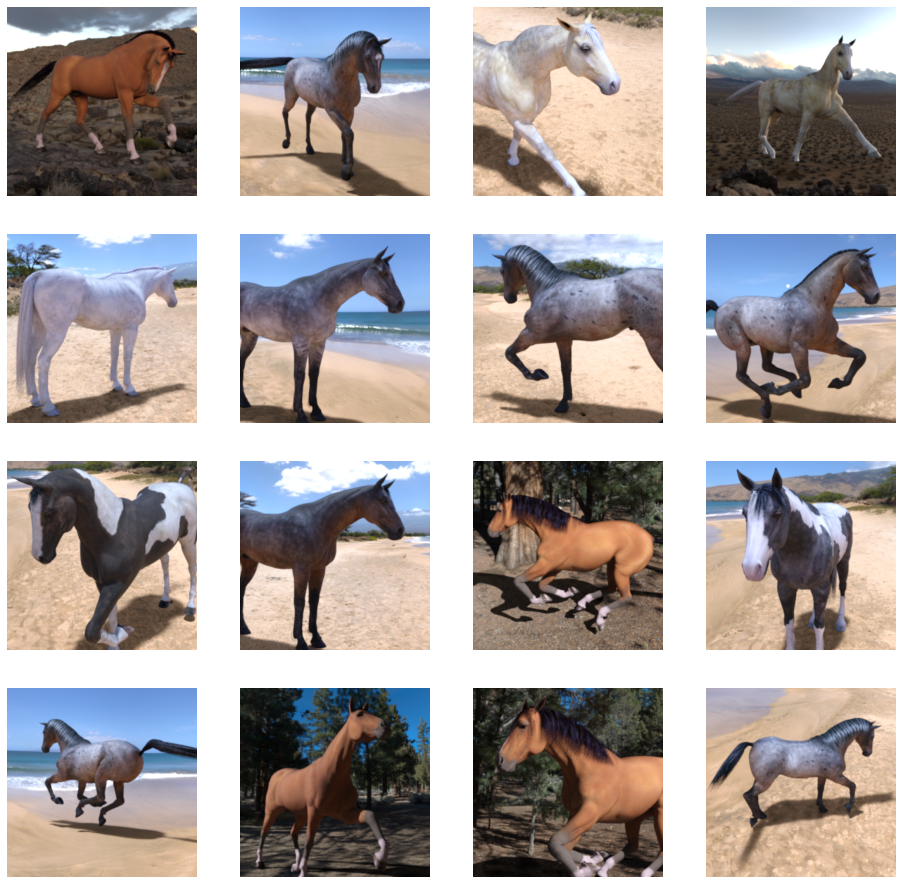

In [11]:
pic_index=0
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
while pic_index<16:
  sp=plt.subplot(nrows,ncols,pic_index+1)
  sp.axis("Off")
  img=mpimg.imread("/tmp/human-or-horse/horses/"+train_horse_names[pic_index])
  sp.imshow(img)
  pic_index+=1
fig.set_size_inches(ncols*4,nrows*4)
plt.show()

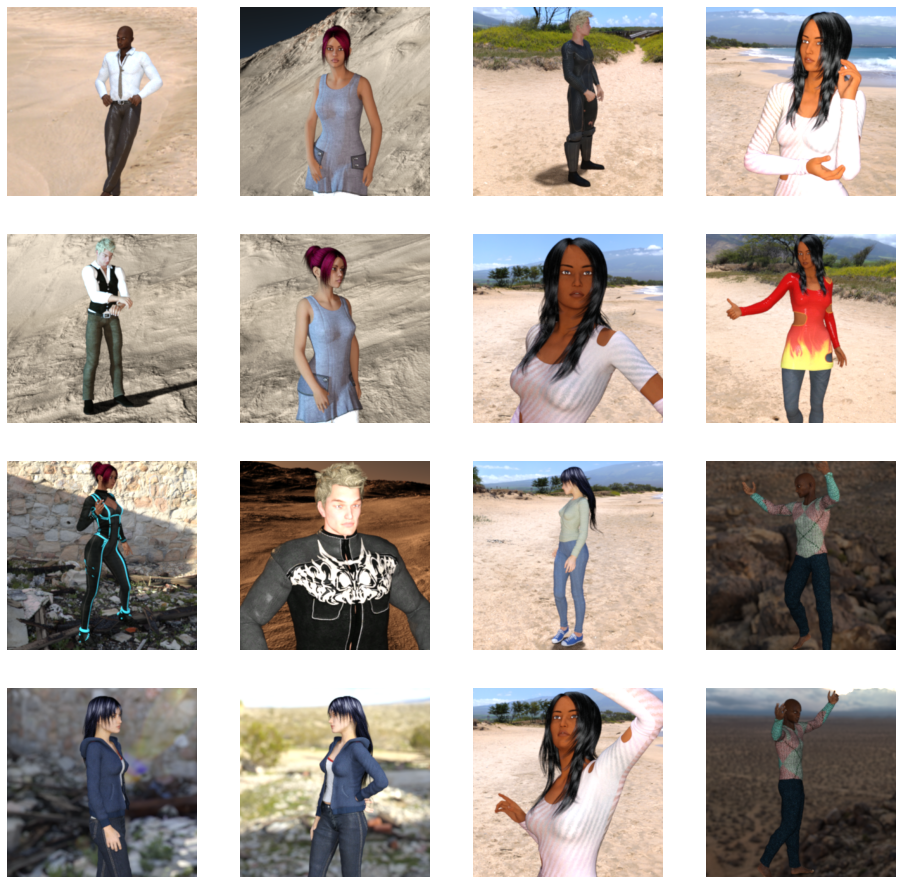

In [12]:
pic_index=0
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
while pic_index<16:
  sp=plt.subplot(nrows,ncols,pic_index+1)
  sp.axis("Off")
  img=mpimg.imread("/tmp/human-or-horse/humans/"+train_human_names[pic_index])
  sp.imshow(img)
  pic_index+=1
fig.set_size_inches(ncols*4,nrows*4)
plt.show()

In [13]:
import tensorflow as tf

In [14]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
                                  ])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [16]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.0)
train_generator=train_datagen.flow_from_directory("/tmp/human-or-horse/",target_size=(300,300),batch_size=128,class_mode="binary")

Found 1027 images belonging to 2 classes.


In [20]:
history=model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1)

Epoch 1/15
8/8 [==============================] - 78s 9s/step - loss: 0.6756 - accuracy: 0.6042
Epoch 2/15
8/8 [==============================] - 73s 9s/step - loss: 0.4108 - accuracy: 0.7948
Epoch 3/15
8/8 [==============================] - 73s 9s/step - loss: 0.1731 - accuracy: 0.9431
Epoch 4/15
8/8 [==============================] - 73s 9s/step - loss: 0.1483 - accuracy: 0.9375
Epoch 5/15
8/8 [==============================] - 73s 9s/step - loss: 0.1761 - accuracy: 0.9193
Epoch 6/15
8/8 [==============================] - 73s 9s/step - loss: 0.0773 - accuracy: 0.9716
Epoch 7/15
8/8 [==============================] - 73s 9s/step - loss: 0.0620 - accuracy: 0.9721
Epoch 8/15
8/8 [==============================] - 73s 9s/step - loss: 0.0480 - accuracy: 0.9812
Epoch 9/15
8/8 [==============================] - 85s 11s/step - loss: 0.0380 - accuracy: 0.9868
Epoch 10/15
8/8 [==============================] - 73s 9s/step - loss: 0.0250 - accuracy: 0.9935
Epoch 11/15
8/8 [=====================

In [22]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [25]:
successive_outputs=[layer.output for layer in model.layers]

In [27]:
visualization_model=tf.keras.models.Model(inputs=model.input,outputs=successive_outputs)

In [28]:
horse_image_files=[os.path.join(train_horse_dir,f) for f in train_horse_names]
human_image_files=[os.path.join(train_human_dir,f) for f in train_human_names]

In [39]:
img_path=random.choice(horse_image_files+human_image_files)

In [40]:
img=load_img(img_path,target_size=(300,300))

In [41]:
x=img_to_array(img)

In [42]:
x=x.reshape((1,)+x.shape)

In [43]:
x/=155

In [48]:
successive_feature_maps = visualization_model.predict(x)
layer_names=[layer.name for layer in model.layers]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


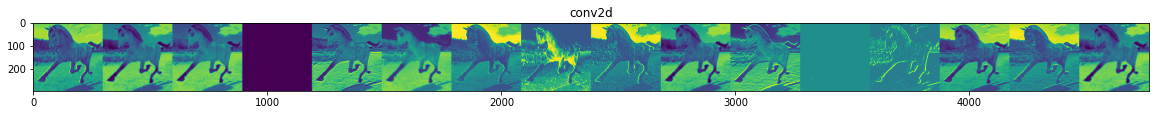

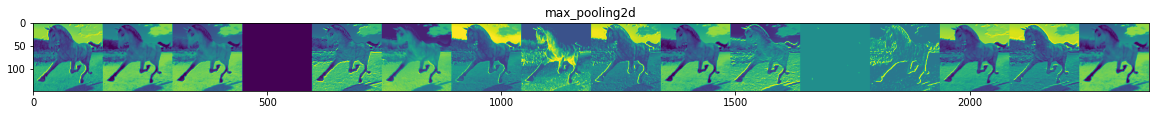

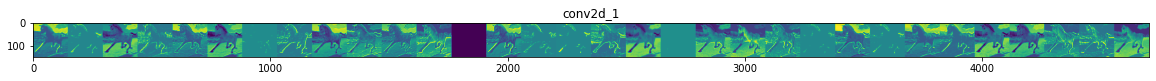

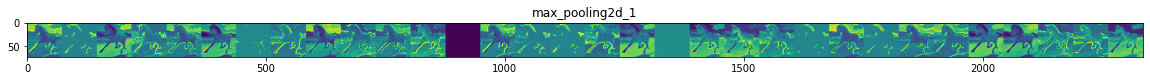

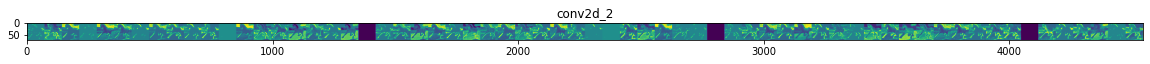

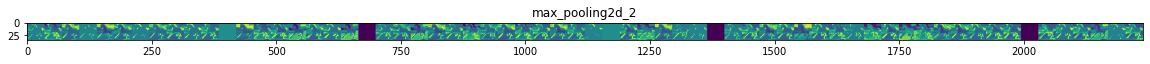

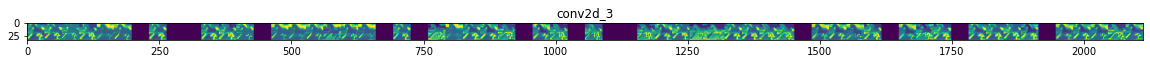

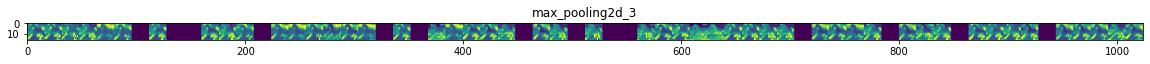

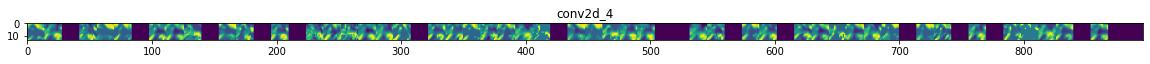

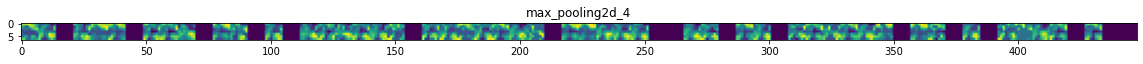

In [49]:
for layer_name,feature_map in zip(layer_names,successive_feature_maps):
  if len(feature_map.shape)==4:
    n_features = feature_map.shape[-1]  
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)